In [1]:
import keras
keras.__version__

'3.9.2'

In [2]:
from keras.datasets import imdb  # Import the IMDB dataset from Keras

# Load the IMDB dataset, limiting to the top 10,000 most frequent words
# train_data, train_labels: Training data and labels
# test_data, test_labels: Test data and labels
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# train_data: Lists of integers representing the words in each movie review in the training set
# train_labels: Corresponding binary labels for each review (1 for positive, 0 for negative)
# test_data: Lists of integers representing the words in each movie review in the test set
# test_labels: Corresponding binary labels for each review in the test set


In [3]:
train_data[0] 

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

np.int64(1)

In [5]:
# Find the highest integer value (word index) in the training data sequences
# This gives us the index of the most frequent word in the dataset (within the top 10,000 words)

max([max(sequence) for sequence in train_data])
 # Max word index in the entire training data

9999

In [6]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# We decode the first review; note that indices are offset by 3
# because 0, 1, and 2 are reserved: "padding", "start of sequence", "unknown"
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print(decoded_review) 

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [7]:
decoded_review 

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
import numpy as np  # Importing numpy for array operations

# Function to vectorize sequences of word indices
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    # Each row corresponds to a review, and the 'dimension' is the total number of words in the vocabulary (10000 in this case)
    results = np.zeros((len(sequences), dimension))  
    
    for i, sequence in enumerate(sequences):
        # Set specific indices of results[i] to 1 based on the word indices in the sequence
        # If sequence contains word index 1, the 1st index of results[i] is set to 1, and so on for each word in the sequence
        results[i, sequence] = 1.  
    
    return results

# Vectorize training and test data (convert word indices to binary vectors)
x_train = vectorize_sequences(train_data)  # Convert the training data into binary vectors
x_test = vectorize_sequences(test_data)    # Convert the test data into binary vectors

# Convert labels (sentiment labels) to float32 numpy arrays for compatibility with neural network
y_train = np.asarray(train_labels).astype('float32')  # Convert train labels to float32 type
y_test = np.asarray(test_labels).astype('float32')    # Convert test labels to float32 type


In [9]:
x_train[0] 

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
# Convert labels (sentiment labels for training and test data) into float32 numpy arrays for model compatibility
y_train = np.asarray(train_labels).astype('float32')  # Convert the training labels to float32 type
y_test = np.asarray(test_labels).astype('float32')    # Convert the test labels to float32 type

In [11]:
from keras.models import Sequential  # Import Sequential model from Keras
from keras.layers import Dense, Input  # Import Dense and Input layers from Keras

# Define the model using the Sequential API
model = Sequential([
    # Input layer: Specifies the input shape for the model (10000 features, one for each word in the vectorized review)
    Input(shape=(10000,)),  # Input layer with 10000 features (for each word index in the review)

    # First hidden layer: A fully connected layer with 64 units and ReLU activation
    Dense(64, activation='relu'),  # Dense layer with 64 units and ReLU activation

    # Output layer: A single unit (since we're doing binary classification), with sigmoid activation
    Dense(1, activation='sigmoid')  # Output layer with a sigmoid activation (outputs a probability)
])


In [12]:
# Compile the model with optimizer, loss function, and evaluation metrics
model.compile(
    optimizer='rmsprop',                  # Optimizer used to minimize the loss function (RMSprop is commonly used for deep learning)
    loss='binary_crossentropy',           # Loss function for binary classification (binary crossentropy measures the error between predicted and actual binary labels)
    metrics=['accuracy']                  # Evaluation metric to track model's performance (accuracy in this case)
)


In [13]:
from keras import optimizers  # Import the optimizers module from Keras

# Compile the model with a custom RMSprop optimizer, loss function, and evaluation metrics
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),  # RMSprop optimizer with a custom learning rate (0.001)
    loss='binary_crossentropy',                          # Binary crossentropy loss for binary classification
    metrics=['accuracy']                                 # Track accuracy during training and evaluation
)


In [14]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

# Compile model using explicit modules: RMSprop optimizer with custom learning rate,
# binary_crossentropy loss, and binary_accuracy as the evaluation metric


In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Split training data into partial training set and validation set (10,000 samples for validation)


In [16]:
history = model.fit(partial_x_train,
 partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

# Train the model for 20 epochs with batch size 512, using validation data to monitor performance

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - binary_accuracy: 0.7072 - loss: 0.5715 - val_binary_accuracy: 0.8407 - val_loss: 0.3861
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - binary_accuracy: 0.8906 - loss: 0.3129 - val_binary_accuracy: 0.8880 - val_loss: 0.2955
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - binary_accuracy: 0.9243 - loss: 0.2338 - val_binary_accuracy: 0.8743 - val_loss: 0.3055
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - binary_accuracy: 0.9326 - loss: 0.1982 - val_binary_accuracy: 0.8892 - val_loss: 0.2731
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - binary_accuracy: 0.9441 - loss: 0.1696 - val_binary_accuracy: 0.8864 - val_loss: 0.2804
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - binary_accuracy: 0.9520 - loss: 0.1513 - val_binary_accuracy: 0.8851 - val_loss: 0.2791
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - binary_accuracy: 0.9568 - loss: 0.1378 - val_binary_accuracy: 0.8564 - val_loss: 0.3680
Epoch 8/20
30

In [17]:
history_dict = history.history
history_dict.keys()

# Extract training history as a dictionary; keys include 'loss', 'val_loss', 'binary_accuracy', etc.

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

In [18]:
print(history.history.keys())

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])


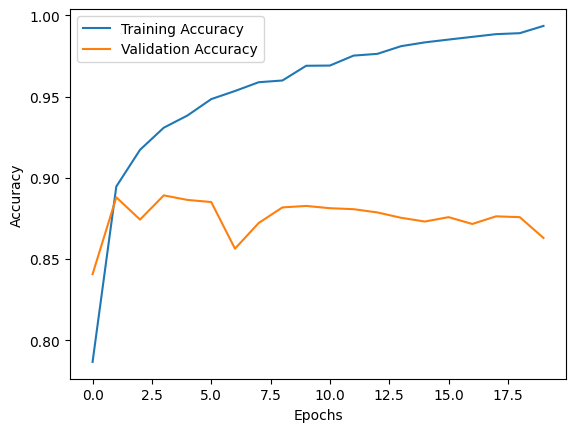

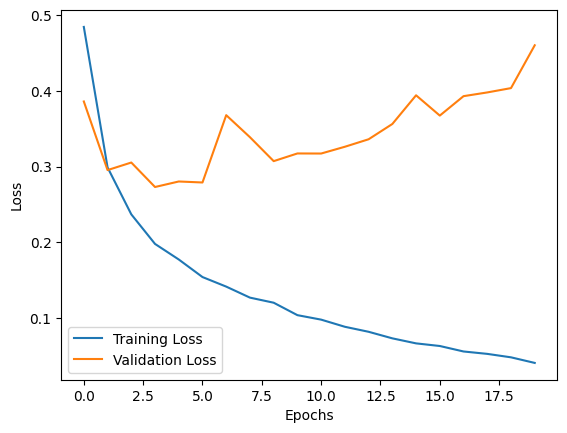

In [19]:
import matplotlib.pyplot as plt
# Assuming you've checked history.keys() and found correct metric names
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
# Plotting training and validation accuracy
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Plotting training and validation loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() 

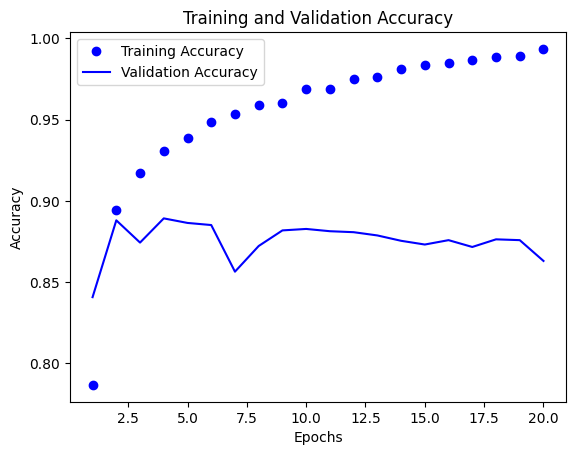

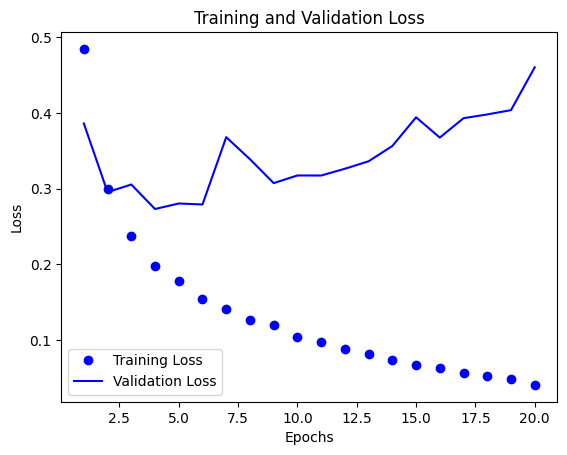

In [20]:
# Extracting the correct values from the history
history_dict = history.history
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Number of epochs
epochs = range(1, len(acc_values) + 1)  # Epochs are indexed starting from 1

# Plotting training and validation accuracy  
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')  # 'bo' means blue dots
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')  # 'b' means solid blue line
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() 

In [21]:
model.predict(x_test) 

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.03470496],
       [0.99998134],
       [0.19330782],
       ...,
       [0.004739  ],
       [0.01000842],
       [0.7461127 ]], dtype=float32)